In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import datetime as dt
import time 
import seaborn as sns 
from matplotlib.ticker import PercentFormatter
import calendar
import matplotlib.ticker as ticker
from PIL import * 
from mpl_toolkits.basemap import Basemap, addcyclic, shiftgrid
from matplotlib.patches import Polygon
from sklearn.metrics import r2_score
import statsmodels.formula.api as smf 
from scipy.io import netcdf
from netCDF4 import Dataset
from wrf import (getvar, interplevel, to_np, latlon_coords)
import cartopy.crs as ccrs
import matplotlib.ticker as mticker
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from mpl_toolkits.axes_grid1 import make_axes_locatable
from scipy.interpolate import interp2d
import matplotlib.cm as cm

In [2]:
ncfile_sst = Dataset("skt_maysak.nc")
lats = ncfile_sst.variables["latitude"][:]
lons = ncfile_sst.variables["longitude"][:]
skt = ncfile_sst.variables["skt"][:] - 273.15
time = ncfile_sst.variables["time"][:]

<ipython-input-2-07669324201c>:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  lats = ncfile_sst.variables["latitude"][:]
<ipython-input-2-07669324201c>:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  lons = ncfile_sst.variables["longitude"][:]
<ipython-input-2-07669324201c>:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `

In [3]:
x1 = [5, 7, 9, 11, 13, 15]

skt1 = skt[x1[0], :, :]
skt2 = skt[x1[1], :, :]
skt3 = skt[x1[2], :, :]
skt4 = skt[x1[3], :, :]
skt5 = skt[x1[4], :, :]
skt6 = skt[x1[5], :, :]

In [4]:
jtwc_lat = [10.9, 11.7, 12.8, 13.7, 14.4, 15]
jtwc_lon = [136.5, 134.6, 133.2, 131.3, 129.2, 127.009]

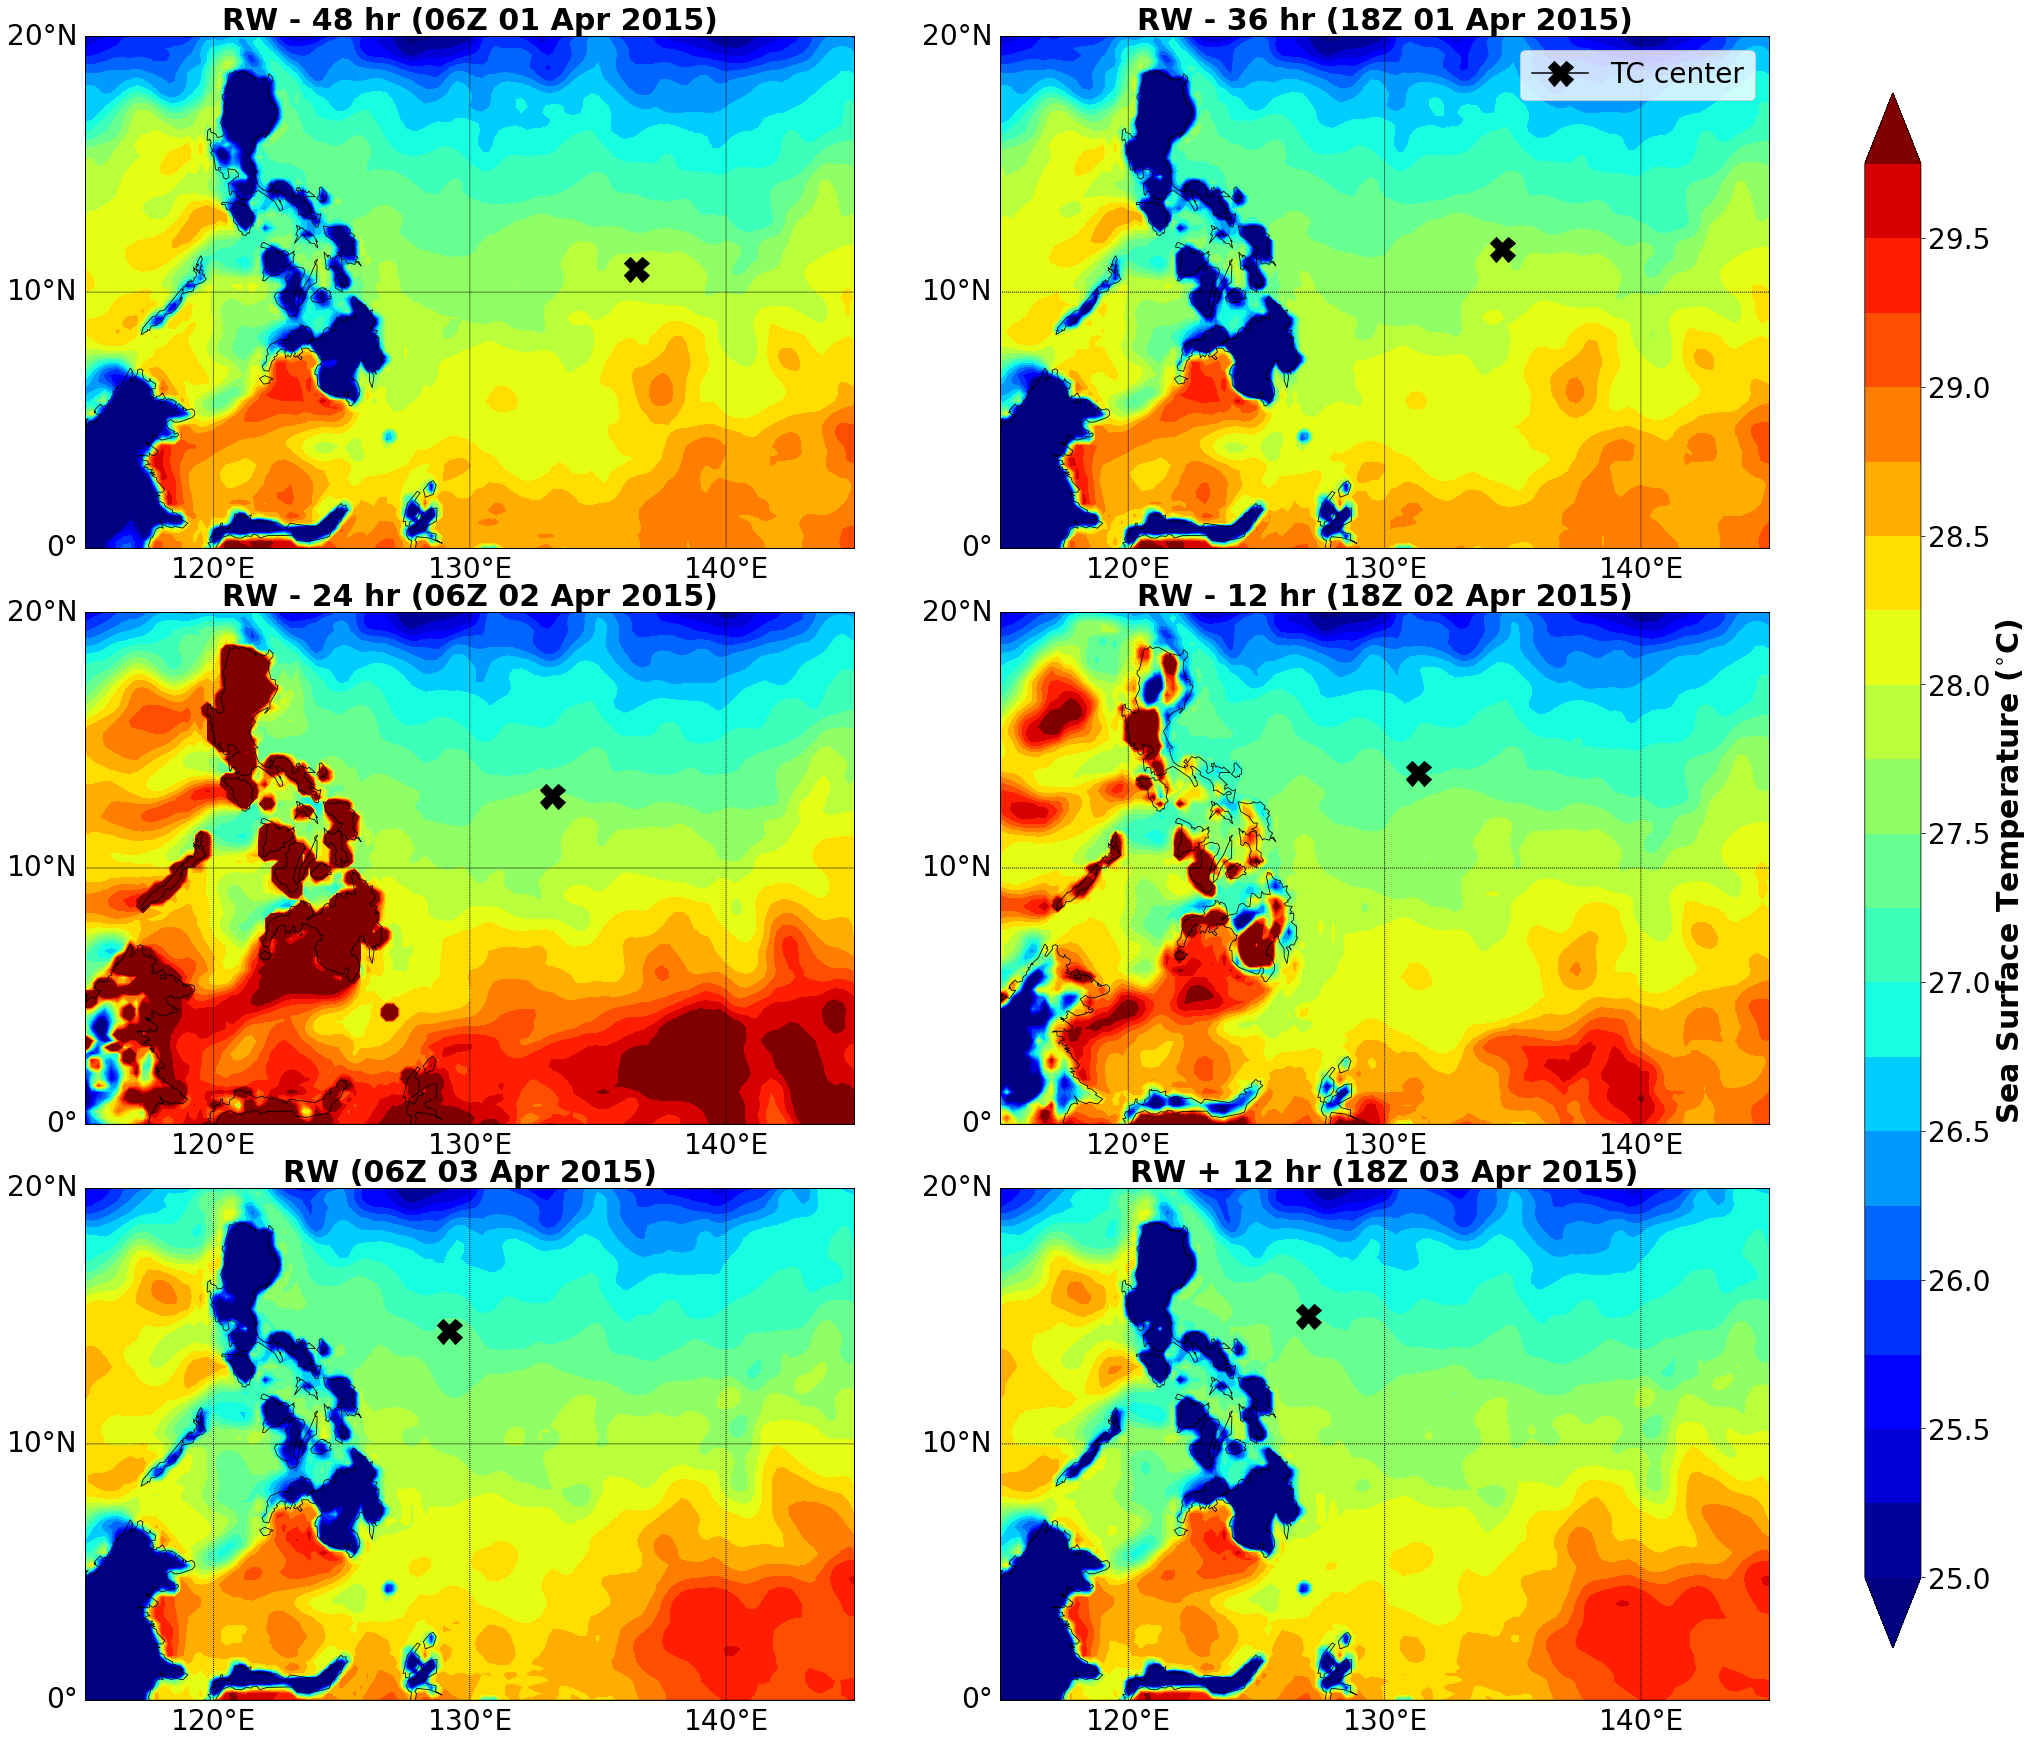

In [5]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize = (26,24))
cmap=cm.get_cmap('jet')

axes[0,0].set_title("RW - 48 hr (06Z 01 Apr 2015)", fontsize = 30,  fontweight = "bold")
m = Basemap(projection='cyl', llcrnrlat=0, urcrnrlat=20,
            llcrnrlon=115, urcrnrlon=145, lon_0=160, resolution='l',  ax=axes[0,0])
m.drawcoastlines(linewidth = 0.8)
m.drawmapboundary()
m.drawparallels(np.arange(-90,90,10),labels=[1,0,0,0], fontsize = 28)
m.drawmeridians(np.arange(0,360,10),labels=[0,0,0,1],  fontsize = 28)
#m.fillcontinents(color='#C7C7C7')
m.plot(jtwc_lon[0], jtwc_lat[0], color = "black", marker = "X", markersize = 25, label = "TC center")

lonss, latss = np.meshgrid(lons, lats)
X, Y = m(lonss, latss)

#cs = m.pcolormesh(X, Y, ri1_jtwc, cmap = cmap,shading='gouraud', vmin = 0, vmax=100)
cs = m.contourf(X, Y, skt1, np.arange(25,30,0.25), cmap = cmap,extend='both', vmin = 25, vmax=30)


######
axes[0,1].set_title("RW - 36 hr (18Z 01 Apr 2015)", fontsize = 30,  fontweight = "bold")
m = Basemap(projection='cyl', llcrnrlat=0, urcrnrlat=20,
            llcrnrlon=115, urcrnrlon=145, lon_0=160, resolution='l',  ax=axes[0,1])
m.drawcoastlines(linewidth = 0.8)
m.drawmapboundary()
m.drawparallels(np.arange(-90,90,10),labels=[1,0,0,0], fontsize = 28)
m.drawmeridians(np.arange(0,360,10),labels=[0,0,0,1],  fontsize = 28)
#m.fillcontinents(color='#C7C7C7')

#cs = m.pcolormesh(X, Y, ri2_jtwc, cmap = cmap,shading='gouraud', vmin = 0, vmax=100)
cs = m.contourf(X, Y, skt2, np.arange(25,30,0.25), cmap = cmap,extend='both', vmin = 25, vmax=30)

m.plot(jtwc_lon[1], jtwc_lat[1], color = "black", marker = "X", markersize = 25, label = "TC center")
axes[0,1].legend(fontsize = 28, loc = "upper right")

######
axes[1,0].set_title("RW - 24 hr (06Z 02 Apr 2015)", fontsize = 30,  fontweight = "bold")
#axes[1,0].set_ylabel('Rapid Weakening',  fontsize = 30, fontweight = "bold", labelpad=80)
m = Basemap(projection='cyl', llcrnrlat=0, urcrnrlat=20,
            llcrnrlon=115, urcrnrlon=145, lon_0=160, resolution='l',  ax=axes[1,0])
m.drawcoastlines(linewidth = 0.8)
m.drawmapboundary()
m.drawparallels(np.arange(-90,90,10),labels=[1,0,0,0], fontsize = 28)
m.drawmeridians(np.arange(0,360,10),labels=[0,0,0,1],  fontsize = 28)
#m.fillcontinents(color='#C7C7C7')

#cs = m.pcolormesh(X, Y, rw1_jtwc, cmap = cmap,shading='gouraud', vmin = 0, vmax=100)
cs = m.contourf(X, Y, skt3, np.arange(25,30,0.25), cmap = cmap,extend='both', vmin = 25, vmax=30)

m.plot(jtwc_lon[2], jtwc_lat[2], color = "black", marker = "X", markersize = 25, label = "TC center")

######
axes[1,1].set_title("RW - 12 hr (18Z 02 Apr 2015)", fontsize = 30,  fontweight = "bold")
m = Basemap(projection='cyl', llcrnrlat=0, urcrnrlat=20,
            llcrnrlon=115, urcrnrlon=145, lon_0=160, resolution='l',  ax=axes[1,1])
m.drawcoastlines(linewidth = 0.8)
m.drawmapboundary()
m.drawparallels(np.arange(-90,90,10),labels=[1,0,0,0], fontsize = 28)
m.drawmeridians(np.arange(0,360,10),labels=[0,0,0,1],  fontsize = 28)
#m.fillcontinents(color='#C7C7C7')

#cs = m.pcolormesh(X, Y, rw2_jtwc, cmap = cmap,shading='gouraud', vmin = 0, vmax=100)
cs = m.contourf(X, Y, skt4, np.arange(25,30,0.25), cmap = cmap,extend='both', vmin = 25, vmax=30)

m.plot(jtwc_lon[3], jtwc_lat[3], color = "black",marker = "X", markersize = 25, label = "TC center")

######
axes[2,0].set_title("RW (06Z 03 Apr 2015)", fontsize = 30,  fontweight = "bold")
#axes[0,0].set_ylabel('Rapid Weakening',  fontsize = 30, fontweight = "bold", labelpad=80)
m = Basemap(projection='cyl', llcrnrlat=0, urcrnrlat=20,
            llcrnrlon=115, urcrnrlon=145, lon_0=160, resolution='l',  ax=axes[2,0])
m.drawcoastlines(linewidth = 0.8)
m.drawmapboundary()
m.drawparallels(np.arange(-90,90,10),labels=[1,0,0,0], fontsize = 28)
m.drawmeridians(np.arange(0,360,10),labels=[0,0,0,1],  fontsize = 28)
#m.fillcontinents(color='#C7C7C7')

#cs = m.pcolormesh(X, Y, r3, cmap = cmap,shading='gouraud', vmin = 0, vmax=100)
cs = m.contourf(X, Y, skt5, np.arange(25,30,0.25), cmap = cmap,extend='both', vmin = 25, vmax=30)

m.plot(jtwc_lon[4], jtwc_lat[4], color = "black",marker = "X", markersize = 25, label = "TC center")

######
axes[2,1].set_title("RW + 12 hr (18Z 03 Apr 2015)", fontsize = 30,  fontweight = "bold")
#axes[1,0].set_ylabel('Rapid Weakening',  fontsize = 30, fontweight = "bold", labelpad=80)
m = Basemap(projection='cyl', llcrnrlat=0, urcrnrlat=20,
            llcrnrlon=115, urcrnrlon=145, lon_0=160, resolution='l',  ax=axes[2, 1])
m.drawcoastlines(linewidth = 0.8)
m.drawmapboundary()
m.drawparallels(np.arange(-90,90,10),labels=[1,0,0,0], fontsize = 28)
m.drawmeridians(np.arange(0,360,10),labels=[0,0,0,1],  fontsize = 28)
#m.fillcontinents(color='#C7C7C7')

#cs = m.pcolormesh(X, Y, r4, cmap = cmap,shading='gouraud', vmin = 0, vmax=100)
cs = m.contourf(X, Y, skt6, np.arange(25,30,0.25), cmap = cmap,extend='both', vmin = 25, vmax=30)
#m.plot(jma_lon[2], jma_lat[2], color = "black", marker = "X", markersize = 25, label = "JMA")
m.plot(jtwc_lon[5], jtwc_lat[5], color = "black", marker = "X", markersize = 25, label = "TC center")

fig.tight_layout(pad = 0.05)
cbar_ax = fig.add_axes([1.01, 0.05, 0.03, 0.9])
cbar = fig.colorbar(cs, ax=axes.ravel().tolist(), cax = cbar_ax, pad = 0.03)
cbar.set_label("Sea Surface Temperature ($^{\circ}$C)", fontsize = 30, fontweight = "bold")
cbar.ax.tick_params(labelsize = 28)
cbar.ax.yaxis.offsetText.set(size = 28)



plt.show()